In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls

EDA.ipynb		   logistic_regression_updated.pyc  submit_double2.csv
Ensembling.ipynb	   main.py			    submit_double.csv
feature_engineering.ipynb  submit.csv			    test.csv
feature_selection.ipynb    submit_double1.csv		    train.csv


In [132]:
!head -10 train.csv

ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
1,36724,14457,118219,118220,117884,117879,267952,19721,117880
1,36135,5396,117961,118343,119993,118321,240983,290919,118322
1,42680,5905,117929,117930,119569,119323,123932,19793,119325
0,45333,14561,117951,117952,118008,118568,118568,19721,118570
1,25993,17227,117961,118343,123476,118980,301534,118295,118982
1,19666,4209,117961,117969,118910,126820,269034,118638,126822
1,31246,783,117961,118413,120584,128230,302830,4673,128231


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [104]:
train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [128]:
train['ACTION'].describe()

count    32769.000000
mean         0.942110
std          0.233539
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: ACTION, dtype: float64

In [4]:
(train['ACTION'] == 0).sum()

1897

In [135]:
train.shape

(32769, 10)

In [65]:
def f(x):
    return len(np.unique(x))

In [109]:
pd.concat([train.agg([min, max]).T, train.agg(f).to_frame()], axis=1).T

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
min,0,0,25,4292,23779,4674,117879,4673,3130,117880
max,1,312153,311696,311178,286791,286792,311867,311867,308574,270691
0,2,7518,4243,128,177,449,343,2358,67,343


In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
ohe = OneHotEncoder()
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]

X_total = pd.concat([X_train, X_test])

X_total_ohe = ohe.fit_transform(X_total)

n_train = X_train.shape[0]

X_train_ohe = X_total_ohe[:n_train,]

X_test_ohe = X_total_ohe[n_train:,]



In [8]:
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(X_train_ohe, y_train)
y_test_pred = clf.predict_proba(X_test_ohe)


KeyboardInterrupt: 

In [79]:
test.index

RangeIndex(start=0, stop=58921, step=1)

In [82]:
y_test_pred.shape

(58921, 2)

In [61]:
def make_submission_file(y_test_pred, filename=None):
    submit_data = pd.DataFrame(columns=['ID', 'ACTION'])
    submit_data['ID'] = xrange(1, len(y_test_pred)+1)
    submit_data['ACTION'] = y_test_pred
    if not filename:
        filename = 'submit.csv'
    submit_data.to_csv(filename, index=False)

In [41]:
!head -10 submit.csv

ID,ACTION
1,0.0529831286064
2,0.0404562637596
3,0.0154604194242
4,0.0252211356251
5,1.07708565389e-05
6,0.0231035286149
7,0.0319142620812
8,0.0061057089802
9,0.0978558668646


### Cross Validation

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
clf = RandomForestClassifier()

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression(C=3)

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import KFold

roc_auc_scores = [] 
for train_ind, cv_ind in KFold(X_train.shape[0]):
    X_tr = X_train_ohe[train_ind]
    y_tr = y_train[train_ind]
    
    X_cv = X_train_ohe[cv_ind]
    y_cv = y_train[cv_ind]
    
    clf.fit(X_tr, y_tr)
    y_cv_pred = clf.predict_proba(X_cv)
    roc_auc_scores.append(roc_auc_score(y_cv, y_cv_pred[:, 1]))
    print roc_auc_scores

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0.87096568528451179]
[0.87096568528451179, 0.84609594095940976]
[0.87096568528451179, 0.84609594095940976, 0.85444967764640689]


In [24]:
def scoring(estimator, X, y):
    y_pred = estimator.predict_proba(X)
    return roc_auc_score(y, y_pred[:, 1])

from sklearn.model_selection import cross_val_score
clf = LogisticRegression(C=3)
clf = gs.best_estimator_
cross_val_score(clf, X_train_ohe, y_train, scoring=scoring)

array([ 0.86976734,  0.84749794,  0.8581708 ])

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": np.logspace(0, 1, 10)}
gs = GridSearchCV(clf, param_grid=param_grid, scoring=scoring)


In [22]:
gs.fit(X_train_ohe, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.     ,   1.29155,   1.6681 ,   2.15443,   2.78256,   3.59381,
         4.64159,   5.99484,   7.74264,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function scoring at 0x7f15c2fc05f0>, verbose=0)

In [23]:
gs.best_estimator_

LogisticRegression(C=2.1544346900318838, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Learning Curves

In [140]:
X_train_ohe.shape

(32769, 16961)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


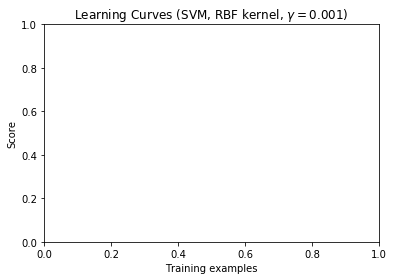

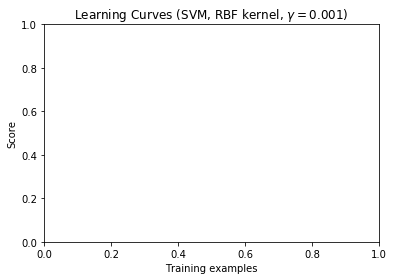

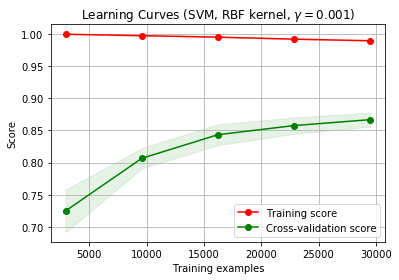

In [29]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, scoring=scoring, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.01)
#plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)
#estimator = LogisticRegression(C=1)
#estimator = gs.best_estimator_
estimator = LogisticRegression(C=3, solver='newton-cg', max_iter=20)# class_weight = 'balanced')


def scoring(estimator, X, y):
    y_pred = estimator.predict_proba(X)
    return roc_auc_score(y, y_pred[:, 1])
   
plot_learning_curve(estimator, title, X_train_ohe, y_train, 
                    scoring=scoring, n_jobs=4, cv=10)


plt.show()

In [35]:
# Shuffle train data

n_train = X_train_ohe.shape[0]
shuffle_index = np.random.permutation(n_train)
#X_train_ohe = X_test_ohe

/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


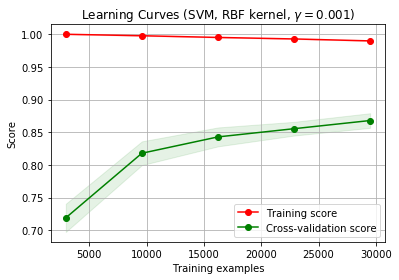

In [36]:

estimator = LogisticRegression(C=3, solver='newton-cg', max_iter=20)# class_weight = 'balanced')


def scoring(estimator, X, y):
    y_pred = estimator.predict_proba(X)
    return roc_auc_score(y, y_pred[:, 1])
   
plot_learning_curve(estimator, title, X_train_ohe[shuffle_index], y_train[shuffle_index], 
                    scoring=scoring, n_jobs=4, cv=10)

plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Con

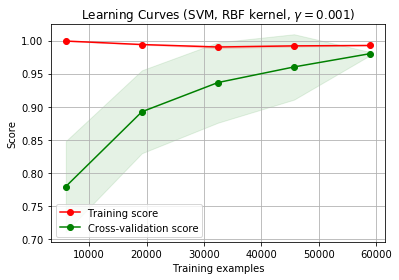

In [59]:

X_train_ohe_double = vstack([X_train_ohe, X_train_ohe])
y_train_double = np.vstack([y_train.reshape(-1, 1), y_train.reshape(-1, 1)]).ravel()

# Shuffle train data

n_train = X_train_ohe_double.shape[0]
shuffle_index = np.random.permutation(n_train)
shuffle_index = range(n_train)

plot_learning_curve(estimator, title, X_train_ohe_double[shuffle_index], y_train_double[shuffle_index], 
                    scoring=scoring, n_jobs=4, cv=10)

plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


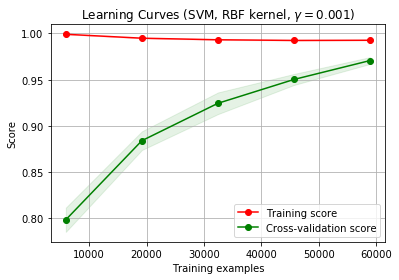

In [120]:
n_stack = 2
X_train_ohe_double = vstack([X_train_ohe for _ in range(n_stack)])
y_train_double = np.vstack([y_train.reshape(-1, 1) for _ in range(n_stack)]).ravel()

# Shuffle train data

n_train = X_train_ohe_double.shape[0]
shuffle_index = np.random.permutation(n_train)

estimator = LogisticRegression(C=3)
plot_learning_curve(estimator, title, X_train_ohe_double[shuffle_index], y_train_double[shuffle_index], 
                    scoring=scoring, n_jobs=4, cv=10)

plt.show()

In [121]:
estimator


LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
def make_submission_file(y_test_pred, filename=None):
    submit_data = pd.DataFrame(columns=['ID', 'ACTION'])
    submit_data['ID'] = xrange(1, len(y_test_pred)+1)
    submit_data['ACTION'] = y_test_pred
    if not filename:
        filename = 'submit.csv'
    submit_data.to_csv(filename, index=False)

In [123]:
estimator = LogisticRegression(C=3, solver='newton-cg', max_iter=20)# class_weight = 'balanced')
estimator = LogisticRegression(C=3)


In [124]:
estimator.fit(X_train_ohe_double[shuffle_index], y_train_double[shuffle_index])

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
y_test_pred = estimator.predict_proba(X_test_ohe)

In [126]:
make_submission_file(y_test_pred, 'submit_double2.csv')

### Oversampling

In [26]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN


In [27]:
oversample = SMOTE()

X_resampled, y_resampled = oversample.fit_sample(X_train_ohe, y_train)


In [28]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(C=3)

In [29]:
logr.fit(X_resampled, y_resampled)

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_test_pred = logr.predict_proba(X_test_ohe)

In [31]:
make_submission_file(y_test_pred, 'submit_double_smote.csv')

In [32]:
X_resampled.shape

(61744, 16961)

In [33]:
X_train_ohe.shape

(32769, 16961)

In [35]:
clf = LogisticRegression(C=3)

In [39]:
# Cross validation

from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import KFold

roc_auc_scores = [] 
for train_ind, cv_ind in KFold(X_train.shape[0], n_folds=5):
    X_tr = X_train_ohe[train_ind]
    y_tr = y_train[train_ind]
    
    X_cv = X_train_ohe[cv_ind]
    y_cv = y_train[cv_ind]
    
    clf.fit(X_tr, y_tr)
    y_cv_pred = clf.predict_proba(X_cv)
    roc_auc_scores.append(roc_auc_score(y_cv, y_cv_pred[:, 1]))
    print roc_auc_scores

[0.8736196094836798]
[0.8736196094836798, 0.869939141527287]
[0.8736196094836798, 0.869939141527287, 0.8554918042533588]
[0.8736196094836798, 0.869939141527287, 0.8554918042533588, 0.8596707771335361]
[0.8736196094836798, 0.869939141527287, 0.8554918042533588, 0.8596707771335361, 0.8674434503155878]


In [40]:
# Cross validation with oversampling

from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import KFold
oversample = RandomOverSampler() 

roc_auc_scores = [] 
for train_ind, cv_ind in KFold(X_train.shape[0], n_folds=5):
    X_tr = X_train_ohe[train_ind]
    y_tr = y_train[train_ind]
    
    X_cv = X_train_ohe[cv_ind]
    y_cv = y_train[cv_ind]
    
    X_tr_os, y_tr_os = oversample.fit_sample(X_tr, y_tr)
    clf.fit(X_tr_os, y_tr_os)
    y_cv_pred = clf.predict_proba(X_cv)
    roc_auc_scores.append(roc_auc_score(y_cv, y_cv_pred[:, 1]))
    print roc_auc_scores

[0.8679451607158458]
[0.8679451607158458, 0.8651870538140536]
[0.8679451607158458, 0.8651870538140536, 0.8547382685590644]
[0.8679451607158458, 0.8651870538140536, 0.8547382685590644, 0.8526445174356443]
[0.8679451607158458, 0.8651870538140536, 0.8547382685590644, 0.8526445174356443, 0.8641702604011763]


### Hyperopt

In [28]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np
import gc

In [30]:
X_train_ohe.shape

(32769, 16961)

In [33]:
y_train.shape

(32769,)

In [42]:
from sklearn.cross_validation import train_test_split
X_train_xgb, X_cv_xgb, y_train_xgb, y_cv_xgb = train_test_split(X_train_ohe, y_train, test_size=0.33)
train_xgb = xgb.DMatrix( X_train_xgb, y_train_xgb )
cv_xgb = xgb.DMatrix( X_cv_xgb, y_cv_xgb )
#Test = xgb.DMatrix( test[features])

In [141]:
from sklearn.metrics import roc_auc_score
def objective(params):
    
    params = {
        'booster': 'gbtree',
        'silent': True,
        'nthread': 8,
        
        'eta': "{:.3f}".format(params['eta']),
        'gamma': "{:.3f}".format(params['gamma']),
        'max_depth': int(params['max_depth']),
        'min_child_weight': int(params['min_child_weight']),
        'subsample': "{:.3f}".format(params['subsample']),        
        'colsample_bytree': "{:.3f}".format(params['colsample_bytree']),
        'lambda': "{:.3f}".format(params['lambda']),
        'alpha': "{:.3f}".format(params['alpha']),
          
        'objective': 'reg:linear',
        'eval_metric': 'auc'
        
    }

    watchlist = [(train_xgb, 'Train'), (cv_xgb, 'Val')]
    
    model = xgb.train(
        params,
        train_xgb,
        25,
        evals=watchlist,
        early_stopping_rounds=10,
        verbose_eval=100 )
    
    

    y_cv_xgb_pred = model.predict(cv_xgb)
    #score = np.sqrt( mean_squared_error(val['target'].clip(0, 20), y_pred.clip(0, 20)))
    print(y_cv_xgb_pred)
    score = roc_auc_score(y_cv, y_cv_xgb_pred)
    #score = 1
                    
    print("score {:.3f} params {}".format(score, params))
    return score

space = {
    'eta': hp.uniform('learning_rate', 0.01, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),'gamma': hp.uniform('gamma', 0.0, 0.3),
    'max_depth': hp.quniform('max_depth', 2, 12, 1),
    'min_child_weight': hp.uniform('min_child_weight', 1, 200),
    'subsample': hp.uniform('subsample', 0.5, 1.0),    
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'lambda': hp.uniform('lambda', 0.0, 0.3),
    'alpha': hp.uniform('alpha', 0.0, 0.3),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=3)

print(best)

[0]	Train-auc:0.540515	Val-auc:0.526688
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 10 rounds.
[24]	Train-auc:0.732082	Val-auc:0.68053
[ 0.96280175  0.96280175  0.94146627 ...,  0.96280175  0.96280175
  0.96280175]
score 0.514 params {'eval_metric': 'auc', 'alpha': '0.007', 'booster': 'gbtree', 'colsample_bytree': '0.654', 'silent': True, 'nthread': 8, 'min_child_weight': 24, 'subsample': '0.510', 'eta': '0.269', 'objective': 'reg:linear', 'max_depth': 3, 'gamma': '0.100', 'lambda': '0.213'}
[0]	Train-auc:0.616261	Val-auc:0.597113
Multiple eval metrics have been passed: 'Val-auc' will be used for early stopping.

Will train until Val-auc hasn't improved in 10 rounds.
[24]	Train-auc:0.733133	Val-auc:0.710024
[ 0.97754544  0.94048434  0.94472992 ...,  0.97354716  0.95231754
  0.98525077]
score 0.514 params {'eval_metric': 'auc', 'alpha': '0.256', 'booster': 'gbtree', 'colsample_bytree': '0.510', 'silent':

In [146]:
def xgb_cv(X_train, y_train, random_state=0):
    eta = 0.3
    max_depth= 20 
    subsample = 1
    colsample_bytree = 1
    min_chil_weight=1
    lambda_ = 10
    #start_time = time.time()

    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "lambda": lambda_,
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "eta": eta,
        "tree_method": 'exact',
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "min_chil_weight":min_chil_weight,
        "seed": random_state,
        #"num_class" : 22,
    }
    num_boost_round = 1000
    early_stopping_rounds = 20
    test_size = 0.1

   
    
    X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=test_size)
    
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_cv, y_cv)

    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

    print("Validating...")
    y_cv_pred = gbm.predict(xgb.DMatrix(X_cv), ntree_limit=gbm.best_iteration+1)
    
    score = roc_auc_score(y_cv, y_cv_pred)
    print("score: %f" % score)
    """
    #area under the precision-recall curve
    score = average_precision_score(X_valid[target].values, check)
    print('area under the precision-recall curve: {:.6f}'.format(score))

    
    check2=check.round()
    score = precision_score(X_valid[target].values, check2)
    print('precision score: {:.6f}'.format(score))

    score = recall_score(X_valid[target].values, check2)
    print('recall score: {:.6f}'.format(score))
    
    imp = get_importance(gbm, features)
    print('Importance array: ', imp)

    print("Predict test set... ")
    test_prediction = gbm.predict(xgb.DMatrix(test[features],missing = -99), ntree_limit=gbm.best_iteration+1)
    score = average_precision_score(test[target].values, test_prediction)
    """
    return params
    

In [164]:
from xgboost.sklearn import XGBClassifier


In [179]:
"""
def xgb_test(X_train, y_train, X_test, params, random_state=0):
    from xgb import XG
    num_boost_round = 1000
    early_stopping_rounds = 20
    test_size = 0.1
    dtrain = xgb.DMatrix(X_train, y_train)
    #dtest = xgb.DMatrix(X_cv, y_cv)

    #watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    watchlist = [(dtrain, 'train'), (dtrain, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, early_stopping_rounds=early_stopping_rounds)

    y_test_pred = gbm.predict(xgb.DMatrix(X_test), ntree_limit=gbm.best_iteration+1)
    
    make_submission_file(y_test_pred)
""" 

"\ndef xgb_test(X_train, y_train, X_test, params, random_state=0):\n    from xgb import XG\n    num_boost_round = 1000\n    early_stopping_rounds = 20\n    test_size = 0.1\n    dtrain = xgb.DMatrix(X_train, y_train)\n    #dtest = xgb.DMatrix(X_cv, y_cv)\n\n    #watchlist = [(dtrain, 'train'), (dvalid, 'eval')]\n    watchlist = [(dtrain, 'train'), (dtrain, 'eval')]\n    gbm = xgb.train(params, dtrain, num_boost_round, early_stopping_rounds=early_stopping_rounds)\n\n    y_test_pred = gbm.predict(xgb.DMatrix(X_test), ntree_limit=gbm.best_iteration+1)\n    \n    make_submission_file(y_test_pred)\n"

In [190]:
import xgboost as xgb
def xgb_test(X_train, y_train, X_test, params, random_state=0):
    num_boost_round = 1000
    early_stopping_rounds = 20
    test_size = 0.1
    dtrain = xgb.DMatrix(X_train)
    
    xgb_clf = XGBClassifier(**params)
    xgb_clf.fit(X_train, y_train,eval_metric='auc')

    y_test_pred = xgb_clf.predict_proba(X_test)[:, 1]
    
    make_submission_file(y_test_pred)
    

In [149]:
params = xgb_cv(X_train_ohe, y_train)

XGBoost params. ETA: 0.3, MAX_DEPTH: 20, SUBSAMPLE: 1, COLSAMPLE_BY_TREE: 1
[0]	train-auc:0.599338	eval-auc:0.572438
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 20 rounds.
[1]	train-auc:0.629334	eval-auc:0.579927
[2]	train-auc:0.654401	eval-auc:0.617621
[3]	train-auc:0.703778	eval-auc:0.651439
[4]	train-auc:0.746956	eval-auc:0.699533
[5]	train-auc:0.769911	eval-auc:0.728424
[6]	train-auc:0.779138	eval-auc:0.735981
[7]	train-auc:0.813302	eval-auc:0.746069
[8]	train-auc:0.838319	eval-auc:0.769574
[9]	train-auc:0.847216	eval-auc:0.775306
[10]	train-auc:0.85147	eval-auc:0.784492
[11]	train-auc:0.860639	eval-auc:0.802519
[12]	train-auc:0.86414	eval-auc:0.79965
[13]	train-auc:0.868579	eval-auc:0.801176
[14]	train-auc:0.872111	eval-auc:0.806039
[15]	train-auc:0.874298	eval-auc:0.810431
[16]	train-auc:0.878275	eval-auc:0.811249
[17]	train-auc:0.87945	eval-auc:0.812733
[18]	train-auc:0.880757	eval-auc:0.813363

In [150]:
params

{'booster': 'gbtree',
 'colsample_bytree': 1,
 'eta': 0.3,
 'eval_metric': 'auc',
 'lambda': 10,
 'max_depth': 20,
 'min_chil_weight': 1,
 'objective': 'binary:logistic',
 'seed': 0,
 'silent': 1,
 'subsample': 1,
 'tree_method': 'exact'}

In [191]:
xgb_test(X_train_ohe, y_train, X_test_ohe, params)


In [192]:
!head submit.csv

ID,ACTION
1,0.573768019676
2,0.970520675182
3,0.974909067154
4,0.980617165565
5,0.994414329529
6,0.977379858494
7,0.971070706844
8,0.992024421692
9,0.691649436951


In [188]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
